In [1]:
import supervision as sv
import numpy as np
import cv2
from ultralytics import YOLO

model = YOLO("weights/yolov8m.pt")

def callback(x: np.ndarray) -> sv.Detections:
    result = model(x, verbose=False, conf=0.25)[0]
    return sv.Detections.from_ultralytics(result)

In [2]:
image = cv2.imread("gyeonggi_0106_day_clear_0027_0000.jpg")

slicer = sv.InferenceSlicer(callback=callback)
sliced_detections = slicer(image=image)

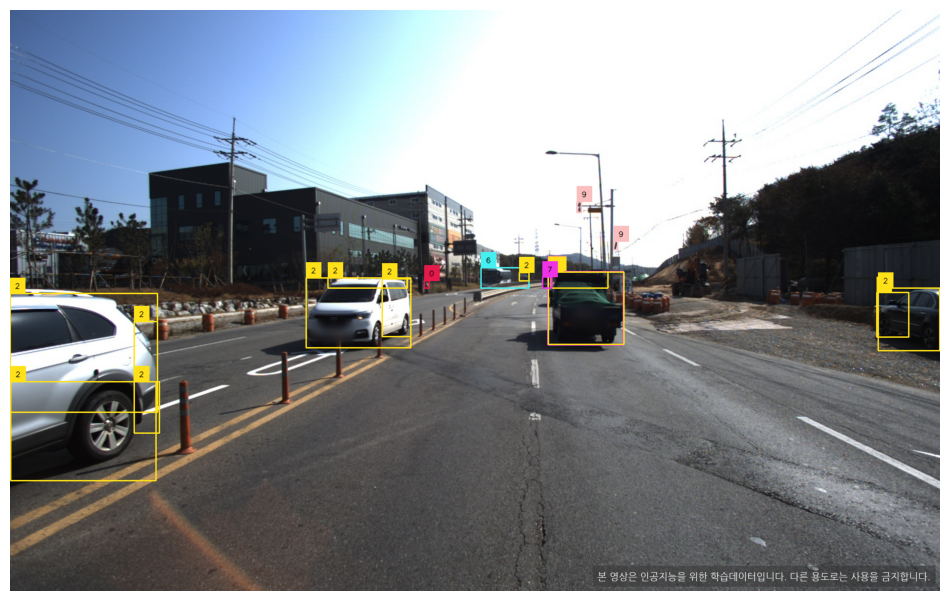

In [3]:
box_annotator = sv.BoxAnnotator()

sliced_image = box_annotator.annotate(image.copy(), detections=sliced_detections)

sv.plot_image(sliced_image)

In [10]:
sliced_detections

Detections(xyxy=array([[     656.74,      554.38,      820.28,      575.82],
       [     768.33,      556.25,      819.44,      575.81],
       [        856,      560.52,      865.11,      575.87],
       [     1116.9,      541.87,      1234.2,      575.83],
       [       1170,       397.5,        1180,      419.41],
       [     1246.3,      479.64,      1254.1,      496.94],
       [     1117.7,      542.16,      1234.9,      575.85],
       [    0.25882,      586.14,      304.99,      831.54],
       [     256.25,      644.79,      304.43,      831.59],
       [     611.44,      554.82,      827.86,      698.34],
       [     768.26,      556.41,      827.71,      675.71],
       [     972.53,      533.84,      1071.4,      575.22],
       [     1110.6,      541.87,        1267,      692.35],
       [     1111.1,      542.05,      1267.4,      691.89],
       [     1099.3,      552.93,      1118.3,      575.85],
       [     1051.8,      543.77,      1071.2,      560.44],
       [

In [12]:
from sahi.utils.yolov5 import (
    download_yolov5s6_model,
)

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

In [13]:
yolov5_model_path = 'weights/detect_model.pt'
download_yolov5s6_model(destination_path=yolov5_model_path)

In [36]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov5',
    model_path=yolov5_model_path,
    confidence_threshold=0.3,
    device="cuda:0", # or 'cuda:0'
    image_size=2048
)

YOLOv5  2023-9-1 Python-3.8.17 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3080, 12288MiB)

Fusing layers... 
Model summary: 477 layers, 77054776 parameters, 0 gradients, 112.5 GFLOPs
Adding AutoShape... 


In [37]:
result = get_prediction(read_image("demo_data/prediction_visual.png"), detection_model)